In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
def transform_to_poly(X,n):
    poly = PolynomialFeatures(n, include_bias=False)
    return poly.fit_transform(X[:, None])

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)

y = np.sin(x) + 0.1 * rng.randn(100)

Let's construct the data again.

[ 5.52421474e+00 -6.21672169e+01  3.14458778e+02 -8.32628659e+02
  1.34551388e+03 -1.44664327e+03  1.09033548e+03 -5.95107717e+02
  2.39609365e+02 -7.15961377e+01  1.57333502e+01 -2.45567801e+00
  2.45831718e-01 -9.84664272e-03 -9.96561482e-04  1.46565567e-04
  1.87804282e-07 -1.29783934e-06  5.57549438e-08  9.85069284e-09
 -1.06041116e-09 -3.19143233e-11  1.36643232e-11 -1.23910644e-12
  5.90471168e-14 -1.53153807e-15  1.72267684e-17]


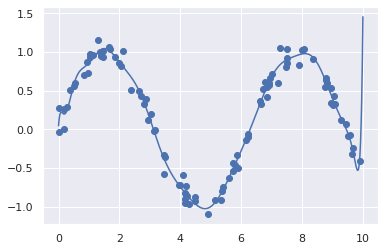

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,normalize=True)

model.fit(transform_to_poly(x,27), y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(transform_to_poly(xfit,27))

plt.scatter(x, y)
plt.plot(xfit, yfit);
print(model.coef_)

See, linear regression with high degree will get into trbouble.

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

model = Ridge(alpha=1e-5,normalize=True)  #Lasso(alpha=1e-5,normalize = True)


model.fit(transform_to_poly(x,27), y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(transform_to_poly(xfit,27))

plt.scatter(x, y)
plt.plot(xfit, yfit);
print(model.coef_)

[ 1.47877629e+00 -6.28791107e-01  3.02072533e-02  5.34304125e-03
  2.69467704e-04 -7.66537911e-06 -3.01457492e-06 -3.66398905e-07
 -3.07298134e-08 -1.79348044e-09 -3.20703767e-11  9.90176955e-12
  1.92986300e-12  2.41085904e-13  2.43596789e-14  2.06883485e-15
  1.40982653e-16  5.77754453e-18 -3.03170325e-19 -1.11212216e-19
 -1.73717240e-20 -2.07839545e-21 -2.04927639e-22 -1.57696949e-23
 -6.01818259e-25  9.23565426e-26  3.03545441e-26]


Use Ridge regression with appropriate parameter gives better answer. We see the coefficients at higher degrees are very small

In [ ]:
rng = np.random.RandomState(1)
x = 2 * rng.rand(100)
x=np.append(x,[2])
y = x**7 - 4*x**5 -1*x**4+ 3*x**3 +2+ 0.5 * rng.randn(101) #np.sin(10*x) + 0.01 * rng.randn(50)

Now let's see another example.

[-1.08356290e+02  5.55730020e+03 -1.07885168e+05  1.14933023e+06
 -7.83491470e+06  3.73467390e+07 -1.31765814e+08  3.56131048e+08
 -7.48522653e+08  1.22104192e+09 -1.51826888e+09  1.38301053e+09
 -8.43317490e+08  2.50361426e+08  6.31989409e+07 -8.37877430e+07
  1.18280669e+07  1.69260950e+07 -6.56923857e+06 -2.81008967e+06
  2.28567035e+06  6.33976447e+04 -5.84274980e+05  2.75780587e+05
 -6.21695257e+04  7.07951360e+03 -3.18663944e+02]


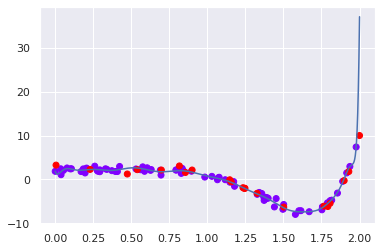

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,normalize=True)
x_train , y_train = x[:80], y[:80]
x_test,y_test=x[80:],y[80:]
model.fit(transform_to_poly(x_train,27), y_train)
xfit = np.linspace(0, 2, 1000)
yfit = model.predict(transform_to_poly(xfit,27))
y_color = np.zeros_like(y)
y_color[80:] =1
plt.scatter(x, y,c=y_color,cmap='rainbow')
plt.plot(xfit, yfit);
print(model.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0789603487629407, tolerance: 0.10121628079858547
  positive)


  (0, 0)	1.8964578432965642
  (0, 2)	-2.6814301854632463
  (0, 3)	-0.597355702435913
  (0, 9)	0.01028792518811499
  (0, 10)	0.005657946284378285
  (0, 11)	0.00198027026154321
  (0, 12)	0.0005866782561324967
  (0, 13)	0.00010787979685763745
  (0, 26)	-3.401192971203042e-09


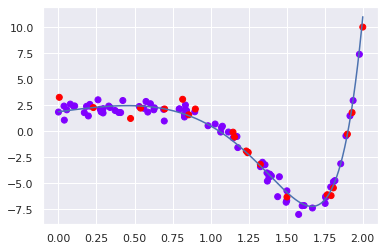

In [ ]:
from sklearn.linear_model import Ridge, Lasso
model = Lasso(alpha=1e-3,normalize = True)

model.fit(transform_to_poly(x_train,27), y_train)
xfit = np.linspace(0, 2, 1000)
yfit = model.predict(transform_to_poly(xfit,27))

plt.scatter(x, y,c=y_color,cmap='rainbow')
plt.plot(xfit, yfit);
print(model.sparse_coef_)

See the coefficients of Lasso are very sparse. 

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1e-3,normalize = True)  #Lasso(alpha=1e-5,normalize = True)


model.fit(transform_to_poly(x_train,27), y_train)
xfit = np.linspace(0, 2, 1000)
yfit = model.predict(transform_to_poly(xfit,27))

plt.scatter(x, y,c=y_color,cmap='rainbow')
plt.plot(xfit, yfit);
print(model.coef_)

[ 1.75194804e+00 -5.80838846e-01 -1.20599078e+00 -7.46952819e-01
 -3.13580110e-01 -9.37606430e-02 -1.15736453e-02  1.00229119e-02
  1.11134006e-02  7.57470636e-03  4.30136110e-03  2.19318223e-03
  1.03181799e-03  4.51641415e-04  1.83057121e-04  6.72266317e-05
  2.10399499e-05  4.45749124e-06 -5.12944859e-07 -1.41230712e-06
 -1.14965988e-06 -7.19478539e-07 -3.90067753e-07 -1.88105081e-07
 -7.92504679e-08 -2.65129926e-08 -3.86443344e-09]


The coefficients of Ridge regressions are not that sparse but averagely small.

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

from sklearn.model_selection import GridSearchCV

parameters = { 'alpha':[1/(10**i) for i in range(20)]}
ridge = Ridge(normalize=True)
model= GridSearchCV(ridge, parameters)

model.fit(transform_to_poly(x_train,27), y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12,
                                   1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18,
                                   1e-19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(model.best_params_)
model.cv_results_

{'alpha': 0.001}


{'mean_fit_time': array([0.00089402, 0.00086241, 0.00084252, 0.00090327, 0.00083227,
        0.00093431, 0.00083809, 0.00084605, 0.00084143, 0.00083752,
        0.000842  , 0.00128989, 0.00085063, 0.0008563 , 0.00084729,
        0.00134015, 0.00131164, 0.0013031 , 0.00130725, 0.0013268 ]),
 'mean_score_time': array([0.00074344, 0.00072913, 0.00070567, 0.00074615, 0.0007195 ,
        0.00074129, 0.00072737, 0.00070696, 0.00070682, 0.00071635,
        0.00072389, 0.00078797, 0.00072813, 0.00071378, 0.0007266 ,
        0.00075498, 0.00075779, 0.00076032, 0.00075307, 0.00077004]),
 'mean_test_score': array([ 0.80941232,  0.92098194,  0.97358975,  0.97654611,  0.97571449,
         0.97408069,  0.97279972,  0.9724634 ,  0.97172123,  0.97029837,
         0.97047884,  0.96427109,  0.955638  ,  0.95498093,  0.95781804,
         0.845726  ,  0.36212022, -0.37122126, -1.16973932, -1.52962731]),
 'param_alpha': masked_array(data=[1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

from sklearn.model_selection import GridSearchCV

parameters = { 'alpha':[1/(10**i) for i in range(20)]}
lasso = Lasso(normalize=True)
model= GridSearchCV(lasso, parameters)

model.fit(transform_to_poly(x_train,27), y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23956900549963933, tolerance: 0.08491148185095666
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16037488768599673, tolerance: 0.0783246476210589
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12953986780321358, tolerance: 0.066263375390374
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12,
                                   1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18,
                                   1e-19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(model.best_params_)

{'alpha': 0.0001}


We can use Grid search on Ridge and Lasso regressions, and finally train again use the whole datasets.